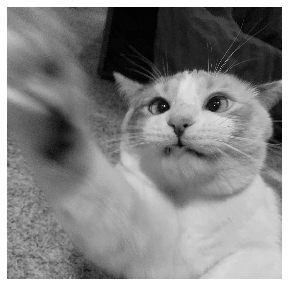

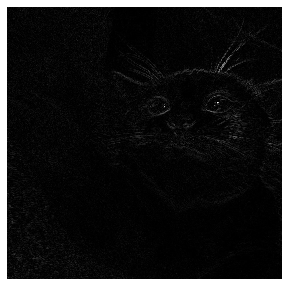

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.2549019  0.03921556 0.13725495 ... 0.09803915 0.05882347 0.09803927]
 [0.01960778 0.01960778 0.05882359 ... 0.13725492 0.03921568 0.07843137]
 ...
 [0.51427436 0.3907647  0.32970595 ... 0.0392158  0.0392158  0.01960778]
 [0.5403726  0.3420589  0.28323543 ... 0.01960802 0.         0.05882359]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[  0.         0.         0.       ...   0.         0.         0.      ]
 [254.90189   39.215565 137.25496  ...  98.039154  58.823467  98.03927 ]
 [ 19.607782  19.607782  58.823586 ... 137.25493   39.215683  78.431366]
 ...
 [514.27435  390.7647   329.70596  ...  39.215805  39.215805  19.607782]
 [540.3726   342.0589   283.23544  ...  19.60802    0.        58.823586]
 [  0.         0.         0.       ...   0.         0.         0.      ]]


In [33]:
from skimage import io, feature, data
from time import time

import skimage
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def load(image_path):
    """Loads an image from a file path, returning a numpy array of shape(image_height, image_width, 3).
    """
    out = skimage.io.imread(image_path)

    # Convert the image to be in the range (0, 1)
    out = out.astype(np.float32) / 255
    return out
    
img = load('cat.png')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display(grey)
#Edge Detection

filter1 = np.array([-5,0,5])

result = np.absolute(cv2.filter2D(grey, -1, filter1))
display(result*1000)
print(result)
print(result*1000)



    

**Goals**

1. Produce a new image with the desired aspect ratio
2. Preserve important content and structure
3. Limit artifacts

**Structure/Steps**

1. Run the image through an edge detector
2. Calculate the seam using dynamic programming
    *top down
    *first row equals the first row (i)
    *second row go through each number, and calculate the value of the cells above it (3 calculations max per cell), take the lowest value and submit that too new array. (i-1)
    *third row go through each number in the original array, and decide which number is the smallest, then add that cell with the current cell in the new array.
    
3. Remove the seam from the image and shift pixels accordingly
4. Repeat until desired aspect ratio is achieved



In [ ]:
# print(image)
# print("------")
# print(result)

# def calculateValues(inpt):
    
#     inpt_copy = inpt.copy()
#     inpt_copy = np.pad(inpt_copy,(0,1), mode = "constant")
#     sArray = np.zeros(inpt_copy.shape)
# #     np.pad(a, , 'linear_ramp', end_values=(5, -4))
# #     print(inpt.shape)
# #     print(inpt_copy.shape)
# #     if type(inpt) != "numpy.ndarray":
# #         print("ERROR: incorrect input")
        
# #     if type(inpt) == "numpy.ndarray":
# #         sArray.append(inpt[0])
        
    
#     for y in range(inpt.shape[0]): #y = height, x = width
#         for x in range(inpt.shape[1]):
# #                 print(str(y) + " " + str(x) + " " + str(z))
# #                 print(inpt[y][x][z]+inpt[y-1][x-1][z] <= inpt[y][x][z]+inpt[y-1][x][z])

#             if y == 1:
#                 pass

#             else:
#                 if (inpt_copy[y][x]+inpt_copy[y-1][x-1] <= inpt_copy[y][x]+inpt_copy[y-1][x]) and inpt_copy[y][x]+inpt_copy[y-1][x-1] <= inpt_copy[y][x]+inpt_copy[y-1][x+1]:
#                         sArray[y][x] = inpt_copy[y][x]+inpt_copy[y-1][x-1]

#                 if inpt_copy[y][x]+inpt_copy[y-1][x] <= inpt_copy[y][x]+inpt_copy[y-1][x-1] and inpt_copy[y][x]+inpt_copy[y-1][x] <= inpt_copy[y][x]+inpt_copy[y-1][x+1]:
#                         sArray[y][x] = inpt_copy[y][x][z]+inpt_copy[y-1][x]

#                 if inpt_copy[y][x]+inpt_copy[y-1][x+1] <= inpt_copy[y][x]+inpt_copy[y-1][x-1] and inpt_copy[y][x]+inpt_copy[y-1][x+1] <= inpt_copy[y][x]+inpt_copy[y-1][x]:
#                         sArray[y][x] = inpt_copy[y][x]+inpt_copy[y-1][x+1]

#                     #keep track of the pixel that has the lowest value.

#     maxArray = np.amax(sArray, axis = 1)

#     print(maxArray)
#     return sArray

# def seamCarve(inpt):
#     inpt_copy = inpt.copy()
#     inpt_copy = np.pad(inpt_copy,(0,1), mode = "constant")
#     sArray = np.zeros(inpt_copy.shape)
# #     np.pad(a, , 'linear_ramp', end_values=(5, -4))
# #     print(inpt.shape)
# #     print(inpt_copy.shape)
# #     if type(inpt) != "numpy.ndarray":
# #         print("ERROR: incorrect input")
        
# #     if type(inpt) == "numpy.ndarray":
# #         sArray.append(inpt[0])
        
    
#     for y in range(inpt.shape[0]): #y = height, x = width
#         for x in range(inpt.shape[1]):
#             pass
            
# out = seamCarve(result)
# # print(out)
# display(out)
